# Calcul de profil de réaction d'un réacteur en mode Batch


## Importer les outils

In [1]:
# vecteurs et algèbre linéaire
import numpy as np

# les outils pour visualiser
import matplotlib.pyplot as plt

# le solveur
import scipy.integrate as solveur


## Définir les constantes du problème

In [2]:
k1 = 0.25 # mol/L*min
k2 = 0.1 #mol/L*min
k3 = 5.0 #mol/L*min

W = 10 #L/min, Vdot de la donnée de l'exercice

FA0 = 1.5*W # mol/min
FB0 = 2.0*W # mol/min
FC0 = 0
FD0 = 0
CA0 = 1.5 # mol/L

## Définir les équations à résoudre

In [3]:
def equations(variables, V, k1, k2, k3):
    FA, FB, FC, FD = variables
    
  
    CA=FA/W
    CB=FB/W
    CC=FC/W
    CD=FD/W
    
    r1 = k1 * CA * CB
    r2 = k2 * CA * CD
    r3 = k3 * CB**2*CC
    
    RA = -r1-3*r3
    RB = -2*r1-r3
    RC = r1+r2-2*r3
    RD = r1-2*r2+r3
    RE = r2
    RF = r3
    
    dFAdV = RA
    dFBdV = RB
    dFCdV = RC
    dFDdV = RD
    
    return dFAdV, dFBdV, dFCdV, dFDdV

## Définir les conditions initiales

In [4]:
conditions_initiales = [FA0, FB0, FC0, FD0] # mol/min

## Résoudre le problème à l'aide du solveur

In [5]:
V = np.linspace(0, 60, 61) # définir les bornes d'intégration

resultats = solveur.odeint(
    equations, 
    conditions_initiales, 
    V, 
    (k1, k2, k3)
)

In [6]:
CA = resultats[:,1]

In [7]:
X = (CA0 - CA) / CA0

## Visualiser les résultats

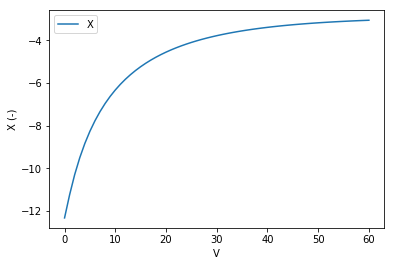

In [8]:
plt.plot(V, X)
plt.xlabel('V')
plt.ylabel('X (-)')
plt.legend(['X'])
plt.show()

In [10]:
X[V > 50][0]

-3.1603625130430468